In [2]:
import numpy as np
import gwsurrogate
import lal
import matplotlib.pyplot as P
sur = gwsurrogate.LoadSurrogate('NRHybSur3dq8_CCE')

Loaded NRHybSur3dq8_CCE model


In [3]:
def SpinPhi(h):
     return -1/(2*dist_mpc) * sum(h[(2,2)].imag)

def GyroPhi(h):
    return 1/4*(sum(h[(2,2)].real * np.gradient(h[(2,2)].imag)) - sum(h[(2,2)].imag * np.gradient(h[(2,2)].real)))

In [4]:
s1 = s2 = np.linspace(-0.8, 0.8, 17)
s1, s2 = np.meshgrid(s1, s2)

Hgyro = s1*s2 
Hspin = s1*s2 
Hh30 = s1*s2 

q = 1.0
M = 60.0
dist_mpc = 100     # distance in megaparsecs
dt = 1./4096       # step size in seconds
f_low = 20         # initial frequency in Hz

for S1 in range(17):
    for S2 in range(17):
        chiA = [0, 0, (S1-8)/10.]
        chiB = [0, 0, (S2-8)/10.]
        
        t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low, M=M, dist_mpc=dist_mpc, units='mks')
        Hgyro[S1,S2] = Hgyro[S2,S1] = GyroPhi(h)
        Hspin[S1,S2] = Hspin[S2,S1] = SpinPhi(h)
        Hh30[S1,S2] = Hh30[S2,S1] = max(h[(3,0)].imag)
        
s1f = s1.flatten()
s2f = s2.flatten()
Hgyrof = Hgyro.flatten()
Hspinf = Hspin.flatten()
Hh30f = Hh30.flatten()

Text(0, 0.5, '$s_{2z}$')

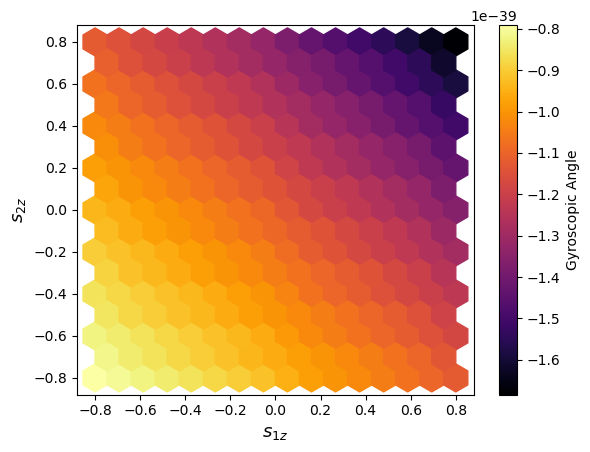

In [5]:
hb = P.hexbin(s1f, s2f, C=Hgyrof, gridsize=15, cmap='inferno')
P.colorbar(hb, label='Gyroscopic Angle')
P.xlabel('$s_{1z}$',fontsize=13)
P.ylabel('$s_{2z}$',fontsize=13)

Text(0, 0.5, '$s_{2z}$')

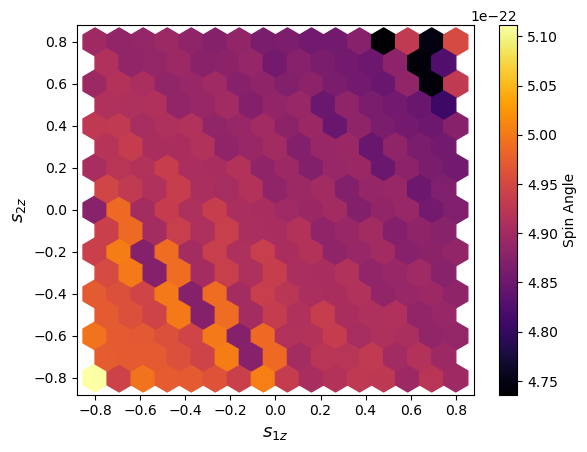

In [6]:
hb = P.hexbin(s1f, s2f, C=Hspinf, gridsize=15, cmap='inferno')
P.colorbar(hb, label='Spin Angle')
P.xlabel('$s_{1z}$',fontsize=13)
P.ylabel('$s_{2z}$',fontsize=13)

Text(0, 0.5, '$s_{2z}$')

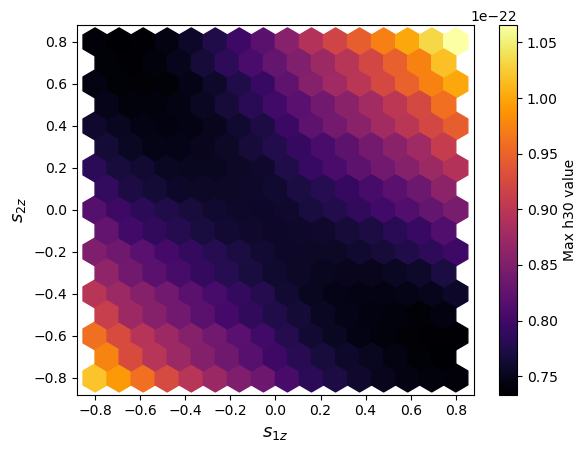

In [7]:
hb = P.hexbin(s1f, s2f, C=Hh30f, gridsize=15, cmap='inferno')
P.colorbar(hb, label='Max h30 value')
P.xlabel('$s_{1z}$',fontsize=13)
P.ylabel('$s_{2z}$',fontsize=13)